## Preprocessing

## Third Stage Optimazation of AlphabetSoupCharity

### Implementing Automated Neural Network Optimization

#### Please Note: If you are running this in Google Colab, you will need to install a package
#### In your colab notebook, create a new first cell for importing the keras tuner package by running the following code:
#### `!pip install keras-tuner`


In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

#  Import and read the charity_data.csv.
app_df = pd.read_csv("Resources/charity_data.csv")
app_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


#### Drop the non-beneficial ID columns, 'EIN' and 'NAME'.

In [2]:
app_df = app_df.drop(columns=["EIN", "NAME"])
app_df.head(1)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1


#### Determine the number of unique values in each column.

In [3]:
app_cat = app_df.dtypes.index.tolist()
app_df[app_cat].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

#### Look at the APPLICATION_TYPE value counts for binning

In [4]:
type_counts = app_df["APPLICATION_TYPE"].value_counts()
type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

#### Choose a cutoff value and create a list of application types to be replaced

In [5]:
Infinity = np.inf
app_type_bins = type_counts.value_counts(bins=[0, 500, Infinity])
app_type_bins

(-0.001, 500.0]    9
(500.0, inf]       8
Name: APPLICATION_TYPE, dtype: int64

In [6]:
app_df["COUNT"] = app_df.groupby(["APPLICATION_TYPE"])["APPLICATION_TYPE"].transform('count')
app_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,COUNT
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,528
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,27037
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,1173
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,27037
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,27037


In [7]:
other_df = app_df.loc[app_df["COUNT"] < 500]
saved_df = app_df.loc[app_df["COUNT"] >= 500]  

#### Use the variable name `application_types_to_replace`

In [8]:
application_types_to_replace = other_df["APPLICATION_TYPE"].value_counts()
application_types_to_replace

T9     156
T13     66
T12     27
T2      16
T25      3
T14      3
T29      2
T15      2
T17      1
Name: APPLICATION_TYPE, dtype: int64

In [9]:
other_df.loc[other_df["APPLICATION_TYPE"] != "Shirley", "APPLICATION_TYPE"] = "Other"
new_type = other_df["APPLICATION_TYPE"].value_counts()
new_type

Other    276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
application_df = pd.concat([saved_df, other_df], axis=0)
application_df = application_df.sort_index(ascending=True)
application_df = application_df.drop(columns=["COUNT"])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [11]:
# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

#### Choose a cutoff value and create a list of classification types to be replaced

In [13]:
class_type_bins = class_counts.value_counts(bins=[0, 1800, Infinity])
class_type_bins

(-0.001, 1800.0]    66
(1800.0, inf]        5
Name: CLASSIFICATION, dtype: int64

In [14]:
application_df["COUNT"] = application_df.groupby(["CLASSIFICATION"])["CLASSIFICATION"].transform('count')
app_df.head(3)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,COUNT
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,528
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,27037
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,1173


In [15]:
other_df = app_df.loc[application_df["COUNT"] < 1800]
saved_df = app_df.loc[application_df["COUNT"] >= 1800]

#### Use the variable name `classifications_to_replace`

In [16]:
classifications_to_replace = other_df["CLASSIFICATION"].value_counts()
classifications_to_replace

C7000    777
C1700    287
C4000    194
C5000    116
C1270    114
        ... 
C4120      1
C8210      1
C2561      1
C4500      1
C2150      1
Name: CLASSIFICATION, Length: 66, dtype: int64

In [17]:
other_df.loc[other_df["CLASSIFICATION"] != "Shirley", "CLASSIFICATION"] = "Other"
new_class = other_df["CLASSIFICATION"].value_counts()
new_class

Other    2261
Name: CLASSIFICATION, dtype: int64

In [18]:
application_df = pd.concat([saved_df, other_df], axis=0)
application_df = application_df.sort_index(ascending=True)
application_df = application_df.drop(columns=["COUNT"])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [19]:
# Check to make sure binning was successful
new_class_counts = application_df['CLASSIFICATION'].value_counts()
new_class_counts

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

#### Convert categorical data to numeric with `OneHotEncoder`

In [20]:
# check dataframe types
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [21]:
# Generate variable list for categories to OnehotEncode
app_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [22]:
# check list
app_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [23]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [24]:
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_cat]))

In [25]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(app_cat)
encode_df.shape

(34299, 49)

In [26]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(app_cat, axis='columns')
application_df.shape

(34299, 52)

In [27]:
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Before auto-tuning a quick peek at datapoints of investment size for both successful and not successful

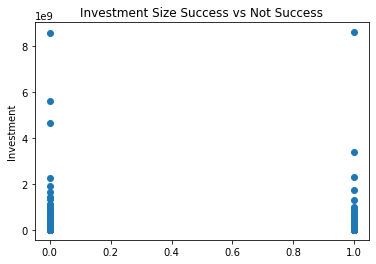

In [28]:
# Build a scatter plot for Temperature
plt.scatter(application_df["IS_SUCCESSFUL"], application_df["ASK_AMT"], marker="o")

# Incorporate the other graph properties
plt.title("Investment Size Success vs Not Success")
plt.ylabel("Investment")

# Save and Shoe the figure
plt.savefig("InvestmentPlot.png")
plt.show()

#### We see that there are large investments, and smaller investments, proportionately similar in both succeessful and non-successful charitable efforts, meaning smaller charities are the bulk of both, and larger charities are less frequent, but have simliar results. 

## Separate Target, Divide train and test sets and Scale

In [29]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], axis="columns").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=61)

In [30]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Automate Tuning the Neural Network Model

In [31]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    
    # Instantiate a Sequential model
    auto_tuned_model = tf.keras.models.Sequential()

    # Allow the preprocess to determine the input dimension
    number_input_features = X_train.shape[1] # Get the number of columns
    
    # Allow kerastuner to decide which activation function to use in hidden layers.
    activation = hp.Choice('activation', ['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide the number of neurons in first layer and also
    # the activation function. 
    auto_tuned_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=100,
        max_value=200,
        step=10), activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide the number of hidden layers and number of 
    # neurons in each one
    for i in range(hp.Int('num_layers', 2, 6)):
        auto_tuned_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=4,
            max_value=15,
            step=2),
            activation=activation))
    
    # Define the output layer
    auto_tuned_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    auto_tuned_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return auto_tuned_model

In [32]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [33]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 34s]
val_accuracy: 0.7271137237548828

Best val_accuracy So Far: 0.729912519454956
Total elapsed time: 00h 13m 07s
INFO:tensorflow:Oracle triggered exit


In [34]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 190,
 'num_layers': 4,
 'units_0': 10,
 'units_1': 12,
 'units_2': 4,
 'units_3': 14,
 'units_4': 12,
 'units_5': 6,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0043'}

In [35]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5556 - accuracy: 0.7299 - 492ms/epoch - 2ms/step
Loss: 0.5555665493011475, Accuracy: 0.729912519454956


In [36]:
# Summarize the best model
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 190)               9880      
                                                                 
 dense_1 (Dense)             (None, 10)                1910      
                                                                 
 dense_2 (Dense)             (None, 12)                132       
                                                                 
 dense_3 (Dense)             (None, 4)                 52        
                                                                 
 dense_4 (Dense)             (None, 14)                70        
                                                                 
 dense_5 (Dense)             (None, 1)                 15        
                                                                 
Total params: 12,059
Trainable params: 12,059
Non-traina

In [37]:
# Export our model to HDF5 file
best_model.save("AlphabetSoupCharity_Optimization6.h5")

#### Auto Tune Optimized the Neural Network
#### This continues to show the same consistent results of the first several manual attempts to optimize.